In [56]:
import pandas as pd
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import csv
from sklearn.linear_model import LogisticRegression
import gensim
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
#reading trianing data
training_data = pd.read_csv("training_data.csv")

In [68]:
#visualizing data in csv
training_data.head()

,Unnamed: 0,target,ids,date,flag,user,text
0,0,0,1880318182,Fri May 22 00:49:17 PDT 2009,NO_QUERY,LetRobesonSing,"@BeesLikeZeebras well that kind of sucks, when..."
1,1,0,1997285897,Mon Jun 01 16:34:56 PDT 2009,NO_QUERY,thatbeegirl,@Jewelbug19 no shirt to be found. don't reall...
2,2,0,2326394339,Thu Jun 25 06:58:54 PDT 2009,NO_QUERY,jeffdegan,I forgot my dog koda outside all night last sa...
3,3,0,2031173719,Thu Jun 04 09:26:18 PDT 2009,NO_QUERY,Travis1079,It looks like there's about to be another huge...
4,4,0,1564200708,Mon Apr 20 02:17:30 PDT 2009,NO_QUERY,ehmmar,wishing that trivium &amp; heaven shall burn w...


In [69]:
#dropping unimportant columns
training_data.drop(training_data.columns[[0,2,3,4,5]], axis = 1, inplace = True)

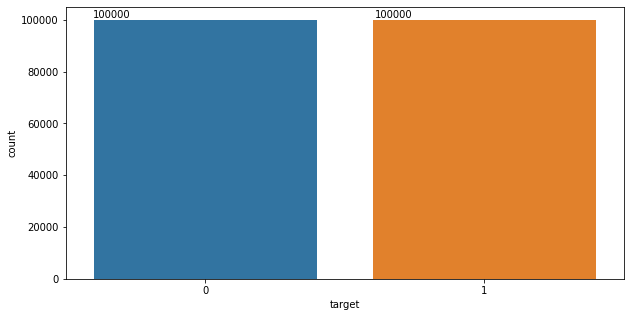

In [70]:
##visualizing number of samples
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
ax=sns.countplot(x='target', data=training_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

In [71]:
#lower case the data
training_data['text'] = training_data['text'].str.lower()
training_data.head()

,target,text
0,0,"@beeslikezeebras well that kind of sucks, when..."
1,0,@jewelbug19 no shirt to be found. don't reall...
2,0,i forgot my dog koda outside all night last sa...
3,0,it looks like there's about to be another huge...
4,0,wishing that trivium &amp; heaven shall burn w...


### Text Pre-processsing 

In [72]:

nltk.download('stopwords')


stop = stopwords.words('english')

# removing stopwords
training_data['text'] = training_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
training_data.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text
0,0,"@beeslikezeebras well kind sucks, i'm awake fo..."
1,0,@jewelbug19 shirt found. really want head mall...
2,0,forgot dog koda outside night last saturday ra...
3,0,looks like there's another huge thunderstorm a...
4,0,wishing trivium &amp; heaven shall burn less o...


In [73]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text) # no emoji
    
training_data['text'] = training_data['text'].apply(remove_emojis)
training_data.head() 

,target,text
0,0,"@beeslikezeebras well kind sucks, i'm awake fo..."
1,0,@jewelbug19 shirt found. really want head mall...
2,0,forgot dog koda outside night last saturday ra...
3,0,looks like there's another huge thunderstorm a...
4,0,wishing trivium &amp; heaven shall burn less o...


In [74]:
#PREPROCESSING USING REGULAR EXPRESSION
def clean_tweets(tweet):    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)    
    # Remove hashtags
    #tweet = re.sub(r"#[^\s]+[\s]?",'',tweet)
    tweet = re.sub(r"#",'',tweet) 
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)    
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)    
    return tweet
# Apply function to Tweet column
training_data['text']  = training_data['text'] .apply(clean_tweets)
training_data.head()

,target,text
0,0,well kind sucks im awake forced awake
1,0,shirt found really want head mall tomorrow either
2,0,forgot dog koda outside night last saturday ra...
3,0,looks like theres another huge thunderstorm ag...
4,0,wishing trivium amp heaven shall burn less one...


In [75]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
training_data['text'] = training_data['text'].apply(lambda x: cleaning_repeating_char(x))
training_data['text'].head()

0                well kind sucks im awake forced awake
1    shirt found really want head mall tomorrow either
2    forgot dog koda outside night last saturday ra...
3    looks like theres another huge thunderstorm ag...
4    wishing trivium amp heaven shall burn less one...
Name: text, dtype: object

In [76]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
training_data['text']= training_data['text'].apply(lambda x: stemming_on_text(x))
training_data['text'].head()

0                well kind sucks im awake forced awake
1    shirt found really want head mall tomorrow either
2    forgot dog koda outside night last saturday ra...
3    looks like theres another huge thunderstorm ag...
4    wishing trivium amp heaven shall burn less one...
Name: text, dtype: object

In [77]:
# Lemmatize the text
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

training_data['lemmatized'] = training_data['text'].apply(lemmatize_text)

# Make lemmatized tokens to sentence
training_data['lemmatized_sent'] = training_data['lemmatized'].str.join(' ')
training_data.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,text,lemmatized,lemmatized_sent
0,0,well kind sucks im awake forced awake,"[well, kind, suck, im, awake, forced, awake]",well kind suck im awake forced awake
1,0,shirt found really want head mall tomorrow either,"[shirt, found, really, want, head, mall, tomor...",shirt found really want head mall tomorrow either
2,0,forgot dog koda outside night last saturday ra...,"[forgot, dog, koda, outside, night, last, satu...",forgot dog koda outside night last saturday ra...
3,0,looks like theres another huge thunderstorm ag...,"[look, like, there, another, huge, thunderstor...",look like there another huge thunderstorm agai...
4,0,wishing trivium amp heaven shall burn less one...,"[wishing, trivium, amp, heaven, shall, burn, l...",wishing trivium amp heaven shall burn le one m...


In [78]:
#visualizing training data 
X = training_data.text
X.head()

0                well kind sucks im awake forced awake
1    shirt found really want head mall tomorrow either
2    forgot dog koda outside night last saturday ra...
3    looks like theres another huge thunderstorm ag...
4    wishing trivium amp heaven shall burn less one...
Name: text, dtype: object

In [79]:
#visualizing test data 
Y = training_data.target
Y.sample(5)

11976     0
28005     0
142628    1
148003    1
58056     0
Name: target, dtype: int64

In [80]:
## Shapes of data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1, random_state =42,stratify=Y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180000,), (20000,), (180000,), (20000,))

In [81]:
##TFIDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  50000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
X_train = vectoriser.transform(X_train)
X_train

<180000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 1528292 stored elements in Compressed Sparse Row format>

In [83]:
X_test  = vectoriser.transform(X_test)
X_test

<20000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 164596 stored elements in Compressed Sparse Row format>

In [84]:
##function for model evaluation
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} : {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     10000
           1       0.76      0.80      0.78     10000

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



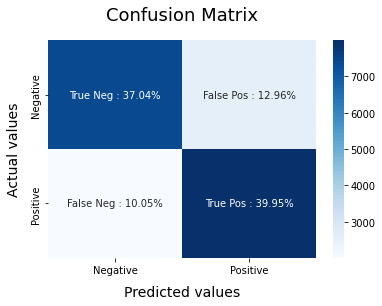

In [85]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

## SVM Model

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     10000
           1       0.75      0.78      0.77     10000

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



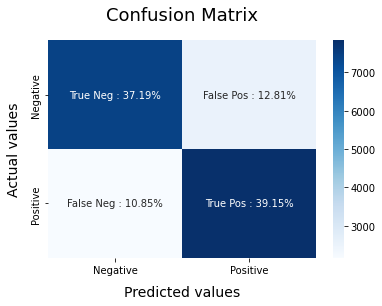

In [86]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

## LR Model

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     10000
           1       0.77      0.80      0.78     10000

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



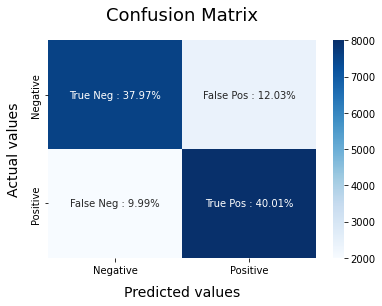

In [87]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

## Prediction on text using BNB Model

In [53]:
tweet_to_predict = "he is very good boy"

In [54]:
##Function for prediction
def predict_Sentiment(tweet):
  tweet = str(tweet.lower())
  tweet = " ".join([word for word in tweet.split() if word not in (stop)])
  tweet = remove_emojis(tweet)
  tweet = clean_tweets(tweet)
  tweet = cleaning_repeating_char(tweet)
  tweet = stemming_on_text(tweet)
  tweet = " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(tweet)])
  prediction = BNBmodel.predict(vectoriser.transform([tweet]))
  print(prediction) 

In [55]:
#1= postive and 0=negative 
predict_Sentiment(tweet_to_predict)

[1]
